# Averaging ERPs

ERPs are typically averaged across many trials within each condition, to improve the signal-to-noise ratio.

Since averaging across trials is typically the end goal of an ERP experiment, MNE provides the class **`Evoked`** for ERP data where multiple trials have been averaged for each experimental condition or trial type.

## Install MNE Library

In [1]:
# install MNE library
!pip install -q mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 56.2 MB/s eta 0:00:00


## Download EEG Data File

We use a data file of ERP epochs containing cleaned data re-referenced to mastoids electrodes:

In [2]:
# download EEG data file
!wget -q https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_14-mstd-epo.fif

## Import Libraries

In [3]:
import mne
mne.set_log_level('error')

import matplotlib.pyplot as plt
import numpy as np

## Read the Cleaned Data

We read a data file of ERP epochs:

In [4]:
# read data
epochs = mne.read_epochs('N400_dataset_14-mstd-epo.fif', preload='True')

# set the easycap-M1 montage to data
epochs.set_montage('easycap-M1', on_missing='ignore')


<EpochsFIF | 538 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~39.5 MiB, data loaded,
 'PicOnset': 144
 'RespPrompt': 95
 'CorResp': 134
 'IncorResp': 11
 'RespFeedback': 10
 'Match/A': 18
 'Match/B': 18
 'Match/C': 18
 'Match/D': 18
 'Mismatch/A': 18
 and 3 more events ...>

## Averaged ERPs

We create a separate **`Evoked`** object for each condition (Match and Mismatch) in our experiment.

For convenience, we will store conditions in a list, and we will creat the list of **`Evoked`** objects using dictionary comprehension, so that each dictionary key is the condition name and its value is the **`Evoked`** object:

In [ ]:
# set conditions in a list
conditions = ['Match', 'Mismatch']

# create a dictionary of Evoked objects from Epochs object for each condition
evokeds = {c:epochs[c].average() for c in conditions}

evokeds

{'Match': <Evoked | '0.25 × Match/A + 0.25 × Match/B + 0.25 × Match/C + 0.25 × Match/D' (average, N=72), -0.2 – 1 s, baseline -0.2 – 0 s, 16 ch, ~100 KiB>,
 'Mismatch': <Evoked | '0.25 × Mismatch/A + 0.25 × Mismatch/B + 0.25 × Mismatch/C + 0.25 × Mismatch/D' (average, N=72), -0.2 – 1 s, baseline -0.2 – 0 s, 16 ch, ~100 KiB>}

## Plot Average ERP for Each Condition

We use the **`evoked.plot_joint()`** method to generate a combination of butterfly plots (waveforms of all electrodes overlaid) and topographic maps at specific time points that we specify.

This is a way of relating scalp topographies and waveforms.

MNE automatically selects the time for the topo plots in each figure based on the time point of the peak amplitude of the ERP at the electrode with the largest amplitude at that time point.

For both the Match and Mismatch conditions, we see two early peaks around 150 and 230 ms that reflect early sensory processes.

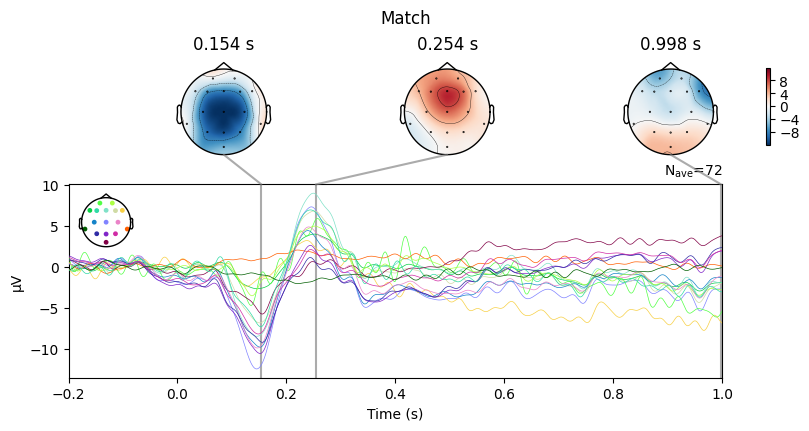

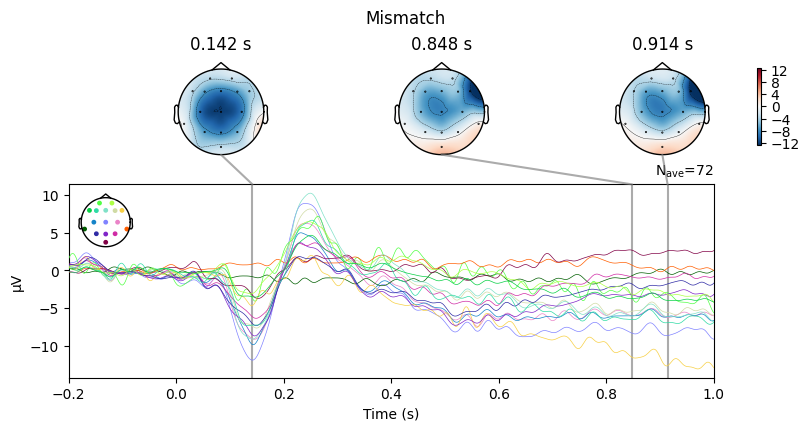

In [ ]:
# plot waveforms and topographic maps
for c in evokeds.keys():
    evokeds[c].plot_joint(title=c);

## Examine Contrasts Between Conditions

Viewing the ERPs for each experimental condition is a good first step, but ultimately any ERP experiment should be designed around contrasts between different conditions.

In the present study, we are interested in the difference between match and mismatch items.

We predicted an N400 component, which would be larger (more negative) for mismatch than match items.

The N400 tends to be largest over the midline centre/posterior region of the scalp (when using averaged-mastoid reference).

We will plot the data at electrode Cz, which typically shows the N400 effect.

We will examine the difference between match and mismatch items.

We use the function **`mne.viz.plot_compare_evokeds()`**, which plots waveforms for each of a list of evoked items that you pass to it:

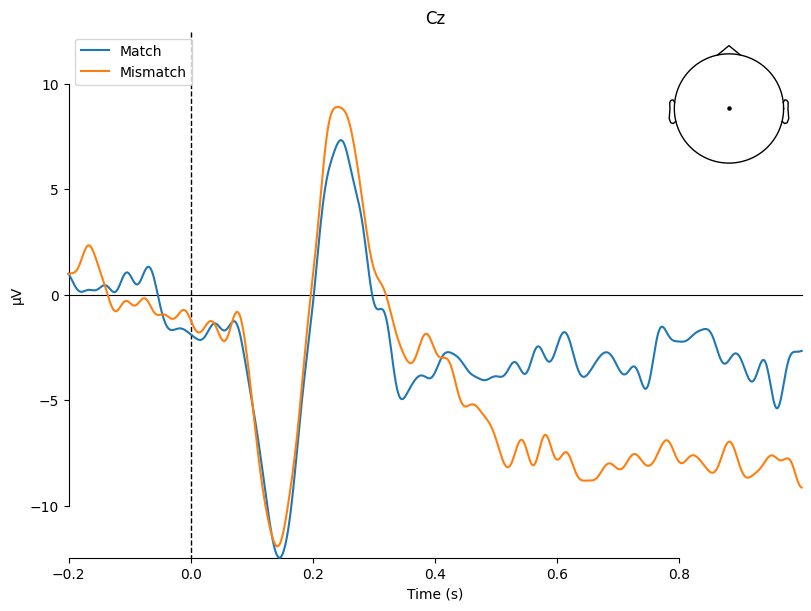

In [ ]:
# plot waveforms of channel Cz for evoked items
mne.viz.plot_compare_evokeds(evokeds, picks='Cz');

### Plot ERP waveform for a Region of Interest

We define a region of interest (ROI) that includes a set of electrodes where the N400 is expected, so that we can plot the ERP waveform averaged over these electrodes.

We add the combine keyword argument to tell MNE how to combine the data from these electrodes.

We define dictionaries mapping condition names to colours and linestyles for the plot, to make the two conditions lines more distinctive.

We tell MNE where to put the legend and plot of the sensor locations, to ensure these don't overlap with the waveforms

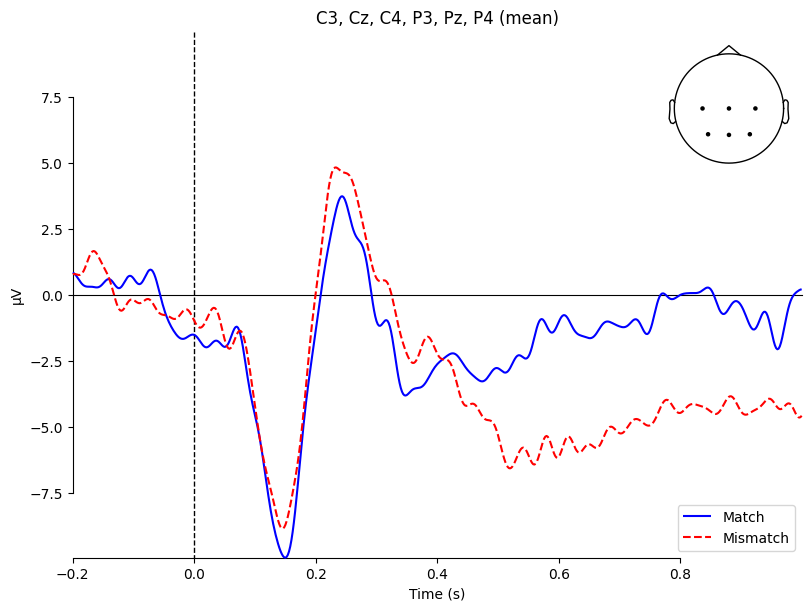

In [ ]:
# set region of interest electrodes
roi = ['C3', 'Cz', 'C4',
       'P3', 'Pz', 'P4']

# set plot line colors and styles
color_dict = {'Match':'blue', 'Mismatch':'red'}
linestyle_dict = {'Match':'-', 'Mismatch':'--'}

# plot the waveforms
mne.viz.plot_compare_evokeds(evokeds, combine='mean',
                             legend='lower right',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict);

The N400 can be observed as the difference between the two conditions waveforms starting just after 400 ms.

As predicted, the Mismatch waveform is more negative than the Match waveform.

In most cases, the N400 lasts for about 200 ms.

However, in this particular individual's data, under these task conditions, the larger negativity for Mismatch lasts until the end of the epoch.

## Save **`Evoked`** objects to a File

We save **`Evoked`** objects to a file using the **`mne.write_evokeds()`** function.

The **`mne.write_evokeds()`** function requires the output file name as its first argument, and the **`Evoked`** data as the second argument.

Note that this function does not accept a dictionary as input, only a single **`Evoked`** object, or a list of **`Evoked`** objects, so we will convert the values of our **`evokeds`** dictionary to a list using the **`list()`** function.

In order to clearly identify each **`Evoked`** object in the list, we use its **`.comment`** attribute wich provides a descriptive label for the averaged condition (Match or Mismatch in the present study), helping users identify the data.

In [ ]:
# label Evoked objects using comment attribute
for condition in evokeds.keys():
    evokeds[condition].comment = condition

# view the results
evokeds

{'Match': <Evoked | 'Match' (average, N=72), -0.2 – 1 s, baseline -0.2 – 0 s, 16 ch, ~100 KiB>,
 'Mismatch': <Evoked | 'Mismatch' (average, N=72), -0.2 – 1 s, baseline -0.2 – 0 s, 16 ch, ~100 KiB>}

#### Save **`Evoked`** Objects to a File

MNE imposes file naming conventions, which specify that **`Evoked`** object file names should always end in **`-ave.fif`**.

In [ ]:
# save Ecoked objects to file
mne.write_evokeds('N400_dataset_14-ave.fif',
                  list(evokeds.values())
                 )